In [9]:
#Importamos las librerías necesarias.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np
import yfinance as yf

sns.set()

In [2]:
#Tomamos el contenido del csv hallado en webscrapping.ipynb
sp500_empresas = pd.read_csv('Empresas_SP500_con_marketcap.csv')
sp500_empresas.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded,Market Capitalization,Current stock value
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902,6.023020e+10,107.80
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916,9.909733e+09,64.90
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888,1.793130e+11,100.46
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888),2.710367e+11,152.71
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989,1.705861e+11,266.53


In [3]:
#Importamos la evolución del índice SP500.
sp500 = pd.DataFrame(yf.Ticker('^GSPC').history('23y'))
sp500.index = sp500.index.strftime('%Y-%m-%d')
sp500.index = pd.to_datetime(sp500.index)
sp500.drop(columns=['Open','High','Low','Dividends','Stock Splits'],inplace=True)
sp500.head()

,Close,Volume
Date,,
2000-02-23,1360.689941,993700000
2000-02-24,1353.430054,1215000000
2000-02-25,1333.359985,1065200000
2000-02-28,1348.050049,1026500000
2000-02-29,1366.420044,1204300000


<Axes: xlabel='Date', ylabel='Close'>

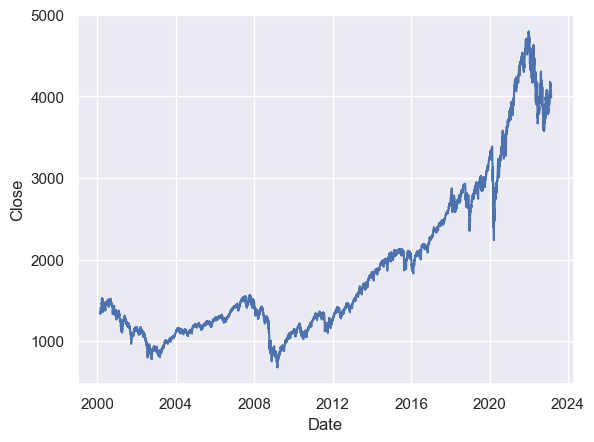

In [4]:
#Graficamos
sns.lineplot(data=sp500,y='Close',x=sp500.index)

Vamos a realizar el mismo gráfico pero para los distintos sectores. Como se mencionó en webscrapping.ipynb no se tendrá en cuenta el sector de energía.

In [5]:
#Seleccionamos un sector cualquiera
sector = 'Information Technology'
sp500_sector_empresas = sp500_empresas[sp500_empresas['GICS Sector']==sector]
sp500_sector_empresas.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded,Market Capitalization,Current stock value
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989,1.705861e+11,266.53
7,ADBE,Adobe Inc.,Information Technology,Application Software,"San Jose, California",1997-05-05,796343,1982,1.595158e+11,320.54
8,ADP,ADP,Information Technology,Data Processing & Outsourced Services,"Roseland, New Jersey",1981-03-31,8670,1949,9.238392e+10,221.58
14,AKAM,Akamai,Information Technology,Internet Services & Infrastructure,"Cambridge, Massachusetts",2007-07-12,1086222,1998,1.183416e+10,72.71
27,AMD,AMD,Information Technology,Semiconductors,"Santa Clara, California",2017-03-20,2488,1969,1.287308e+11,78.09


In [6]:
#Importamos los datos del sector
sp500_sector = pd.DataFrame(yf.Ticker('^SP500-45').history('23y'))          #45 ese el código del sector Information Technology
sp500_sector.index = sp500_sector.index.strftime('%Y-%m-%d')
sp500_sector.index = pd.to_datetime(sp500_sector.index)
sp500_sector.drop(columns=['Open','High','Low','Dividends','Stock Splits'],inplace=True)
sp500_sector.head()

,Close,Volume
Date,,
2000-02-23,834.309631,0
2000-02-24,849.518982,0
2000-02-25,836.369507,0
2000-02-28,832.399780,0
2000-02-29,845.899109,0


<Axes: xlabel='Date', ylabel='Close'>

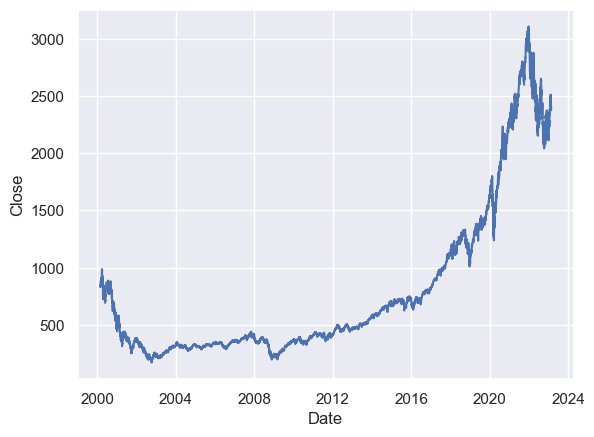

In [7]:
#Realizamos el gráfico
sns.lineplot(data=sp500_sector,y='Close',x=sp500_sector.index)

<Axes: xlabel='Date', ylabel='Close'>

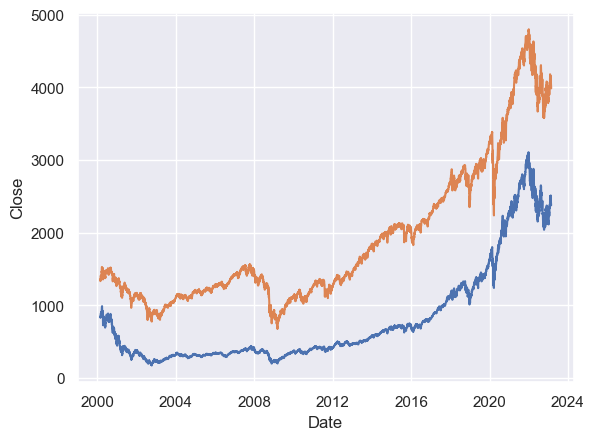

In [8]:
#Comparamos con el SP500
sns.lineplot(data=sp500_sector,y='Close',x=sp500_sector.index)
sns.lineplot(data=sp500,y='Close',x=sp500.index)

Text(0.5, 1.0, 'SP500')

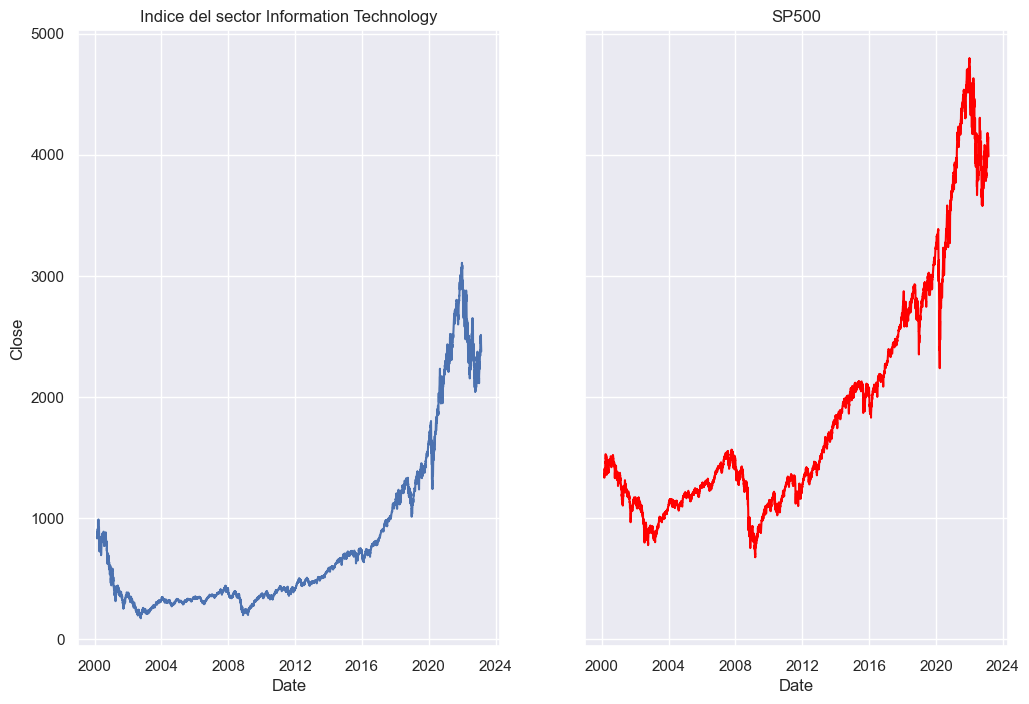

In [9]:
#Colocamos los 2 gráficos uno al lado del otro.
fig, ax = plt.subplots(1,2,sharey=True,figsize=(12,8))


sns.lineplot(data=sp500_sector,y='Close',x=sp500_sector.index,ax=ax[0])
ax[0].set_title('Indice del sector '+sector)

sns.lineplot(data=sp500,y='Close',x=sp500.index,ax=ax[1],color='red')
ax[1].set_title('SP500')

Analizamos ahora empresas dentro del sector seleccionado. Comparamos también con la evolución del sector y del índice SP500.

In [12]:
#Seleccionamos la empresa mas grande del sector
empresa = sp500_sector_empresas.sort_values(by='Market Capitalization',ascending=False).iloc[0]
symbol = empresa['Symbol']
empresa

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded,Market Capitalization,Current stock value
44,AAPL,Apple Inc.,Information Technology,"Technology Hardware, Storage & Peripherals","Cupertino, California",1982-11-30,320193,1977,2.355565e+12,146.71


In [13]:
#Importamos los datos de la evolución de las acciones de la empresa.
empresa_evolucion = pd.DataFrame(yf.Ticker(symbol).history('23y'))          #45 ese el código del sector Information Technology
empresa_evolucion.index = empresa_evolucion.index.strftime('%Y-%m-%d')
empresa_evolucion.index = pd.to_datetime(empresa_evolucion.index)
empresa_evolucion.drop(columns=['Open','High','Low','Dividends','Stock Splits'],inplace=True)
empresa_evolucion.head()

,Close,Volume,Dividends
Date,,,
2000-02-23,0.883415,473099200,0.0
2000-02-24,0.875460,376432000,0.0
2000-02-25,0.838770,249144000,0.0
2000-02-28,0.860618,328328000,0.0
2000-02-29,0.871067,368961600,0.0


<Axes: xlabel='Date', ylabel='Close'>

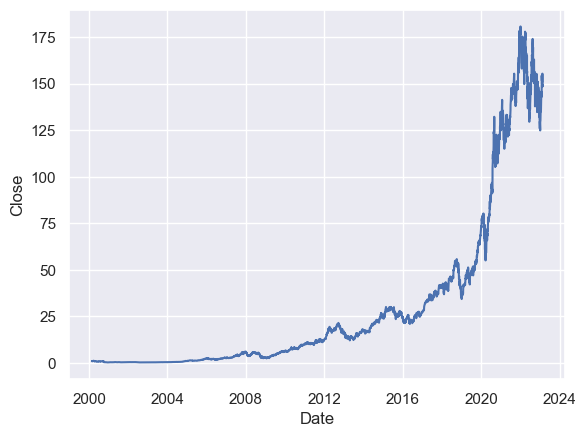

In [14]:
#Graficamos la evolución de la compañía.
sns.lineplot(data=empresa_evolucion,x=empresa_evolucion.index,y='Close')

<Axes: xlabel='Date', ylabel='Close'>

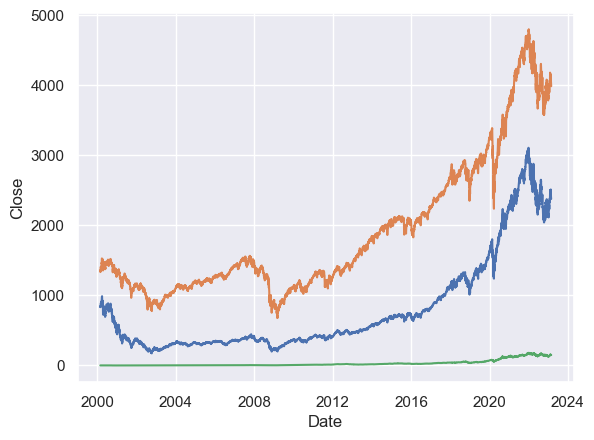

In [15]:
#Comparamos con sector y con SP500
sns.lineplot(data=sp500_sector,y='Close',x=sp500_sector.index)
sns.lineplot(data=sp500,y='Close',x=sp500.index)
sns.lineplot(data=empresa_evolucion,x=empresa_evolucion.index,y='Close')

Text(0.5, 1.0, 'Apple Inc.')

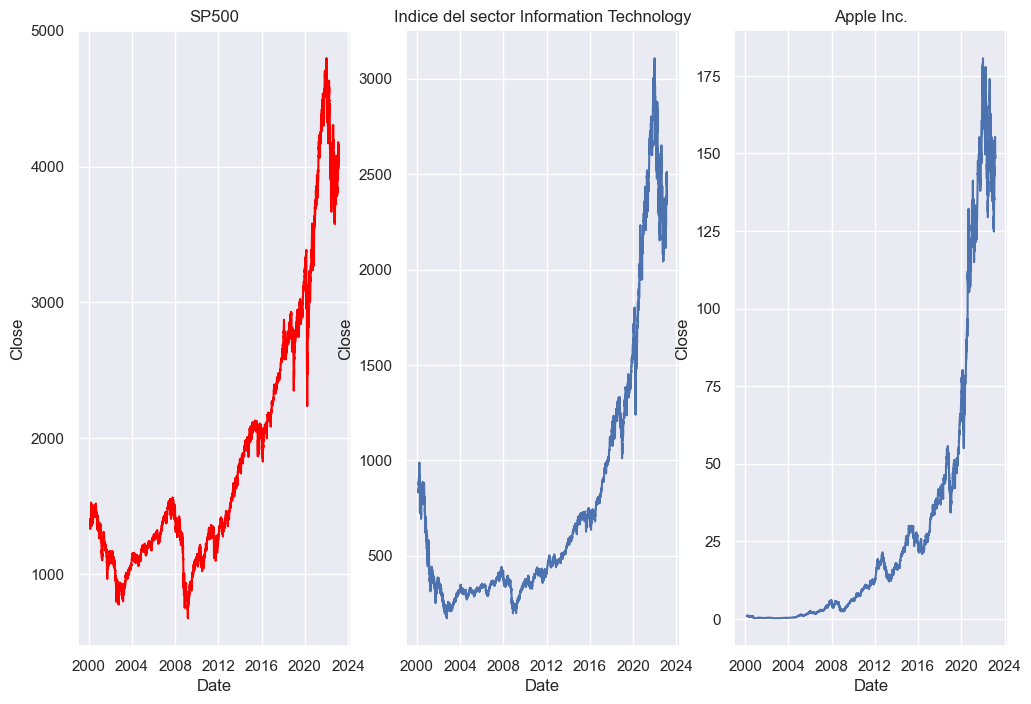

In [17]:
#Colocamos los 3 gráficos uno al lado del otro.
fig, ax = plt.subplots(1,3,figsize=(12,8))

sns.lineplot(data=sp500,y='Close',x=sp500.index,ax=ax[0],color='red')
ax[0].set_title('SP500')

sns.lineplot(data=sp500_sector,y='Close',x=sp500_sector.index,ax=ax[1])
ax[1].set_title('Indice del sector '+sector)

sns.lineplot(data=empresa_evolucion,x=empresa_evolucion.index,y='Close',ax=ax[2])
ax[2].set_title(empresa['Security'].values[0])

Como primer ejemplo de los próximos análisis a realizar puede verse como el SP500, en los últimos años, siguió un patrón muy parecido al del sector IT y este, a su vez, siguió un patrón muy parecido al de su compañía más valiosa (Apple).